/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "
/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/_plotter.py:77: RuntimeWarning: plotly is not available, if other engines are unavailable, only iterator-providing functions will work
  warnings.warn("plotly is not available, if other engines are unavailable,"


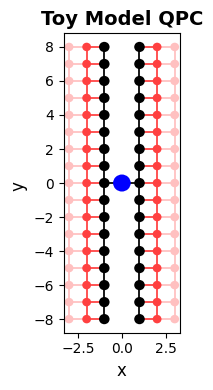

In [1]:
import kwant
import matplotlib.pyplot as plt
import func
from func import make_system

# Build and finalize system
system = make_system()
finalized_system = system.finalized()

# Color the central site differently
def site_color(site):
    return "blue" if site.pos == (0, 0) else "black"

# Adjust site sizes
def site_size(site):
    return 0.5 if site.pos == (0, 0) else 0.3

# Plot with title and labels
fig = plt.figure(figsize=(2, 4))  # Wider figure for clarity
ax = fig.add_subplot(1, 1, 1)

kwant.plot(
    system,
    ax=ax,
    site_color=site_color,
    site_size=site_size,
    show=False
)

ax.set_title("Toy Model QPC", fontsize=14, weight='bold')
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y ", fontsize=12)
plt.tight_layout()
plt.show()


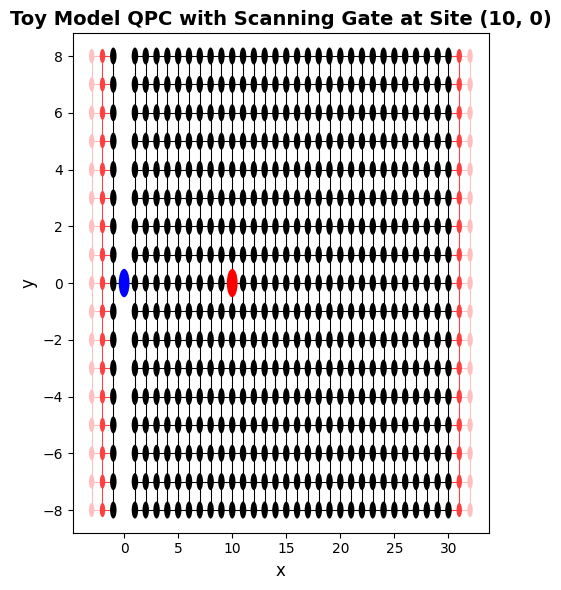

In [ ]:
import kwant
import matplotlib.pyplot as plt
from func import make_qpc_with_tip


# Define system with scanning gate at (10, 0)
tip_position = (10, 0)
system, lattice = make_qpc_with_tip(tip_pos=tip_position)
finalized = system.finalized()

# Define visual styles
def site_color(site):
    if site.pos == (0, 0):
        return "blue"  # Central gate site
    elif site.pos == tip_position:
        return "red"   # Scanning gate (tip)
    else:
        return "black"

def site_size(site):
    if site.pos == (0, 0) or site.pos == tip_position:
        return 0.5
    else:
        return 0.3

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(1, 1, 1)

kwant.plot(
    system,
    ax=ax,
    site_color=site_color,
    site_size=site_size,
    show=False
)

ax.set_title(f"Toy Model QPC with Scanning Gate at Site {tip_position}", fontsize=14, weight='bold')
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
plt.tight_layout()
plt.show()


# Transmission vs Vg at E = -3.8 for different coupling strengths (tc) at the blue point above

### Transmission vs Gate Voltage (Vg) for Various Tunneling Couplings (tc)

The transmission is plotted against gate voltage \(V_g\) for various tunneling couplings \(t_c\). As \(t_c\) decreases, the peak sharpens and narrows, consistent with theoretical predictions of resonance localization due to weaker coupling.


/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


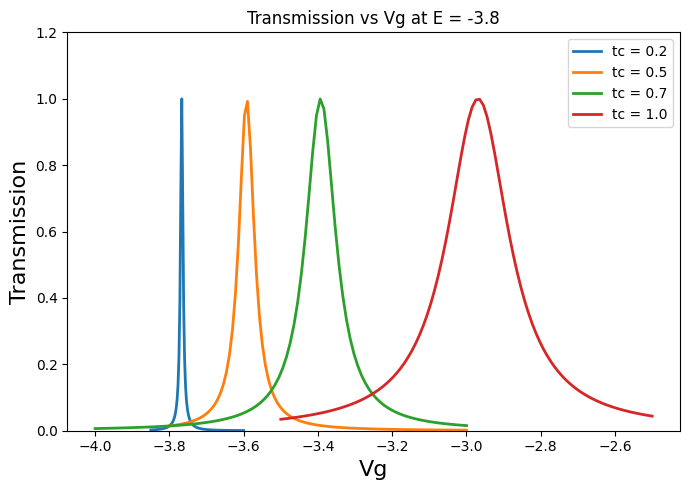

In [43]:
import importlib
import func
importlib.reload(func)
from func import make_and_run_study
import matplotlib.pyplot as plt

make_and_run_study(
    tc_values=[0.2, 0.5, 0.7, 1.0],
    Vg_ranges=[(-3.85, -3.60), (-3.80, -3.00), (-4.00, -3.00), (-3.50, -2.50)],
    divisors=[1000, 100, 100, 100],
    energy=-3.8,
    N=100  )


In [ ]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import time

def make_system2(w=5, length=40):
    lat = kwant.lattice.square()
    sys = kwant.Builder()

    def Pot(site, Vg):
        return Vg

    def Hop(site1, site2, tc):
        return tc

    def Vtip(site, v, y0, x0):
        return v if site.pos == (x0, y0) else 0

    # Central site
    sys[lat(0, 0)] = Pot

    # Define scattering region with tip potential placeholder
    sys[(lat(x, y) for x in range(1, length) for y in range(-w, w + 1))] = Vtip

    # Add basic structure and hoppings
    sys[(lat(-1, y) for y in range(-w, w + 1))] = 0
    sys[lat.neighbors()] = -1
    sys[lat(0, 0), lat(-1, 0)] = Hop
    sys[lat(0, 0), lat(1, 0)] = Hop

    # Add leads
    sym = kwant.TranslationalSymmetry((-1, 0))
    lead = kwant.Builder(sym)
    lead[(lat(-2, y) for y in range(-w, w + 1))] = 0
    lead[lat.neighbors()] = -1
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed(), add_cells=0)

    return sys.finalized()

# Define simulation parameters
w = 5
x_vals = np.arange(1, 150)
y_vals = np.arange(-25, 25)
energy = -3.8
params_base = dict(Vg=-3.7634626925385075, tc=0.2, v=2)

# Finalize system once
sysf = make_system(w=w)

# Initilize transmission matrix
T_map = np.zeros((len(x_vals), len(y_vals)))

start = time.time()

# Compute transmissions
for ix, x0 in enumerate(x_vals):
    for iy, y0 in enumerate(y_vals):
        params = {**params_base, 'x0': x0, 'y0': y0}
        smatrix = kwant.smatrix(sysf, energy=energy, params=params)
        T_map[ix, iy] = smatrix.transmission(0, 1)

end = time.time()
print(f"Total simulation time: {end - start:.2f} seconds")


np.save("transmission_map_tip.npy", T_map)


/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


Total simulation time: 125.70 seconds


In [ ]:
# Parameters
params_base = dict(Vg=-3.7634626925385075, tc=0.2, v=0)  # No tip

# Finalize system 
sysf = make_system(w=w)

# Initialize transmission matrix without tip
T_map_no_tip = np.zeros((len(x_vals), len(y_vals)))


start = time.time()

# Compute transmission
for ix, x0 in enumerate(x_vals):
    for iy, y0 in enumerate(y_vals):
        params = {**params_base, 'x0': x0, 'y0': y0}
        smatrix = kwant.smatrix(sysf, energy=energy, params=params)
        T_map_no_tip[ix, iy] = smatrix.transmission(0, 1)

end = time.time()
print(f"Finished no-tip map in {end - start:.2f} s")

# Save to file
np.save("L3.npy", T_map_no_tip)

/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


Finished no-tip map in 132.08 s


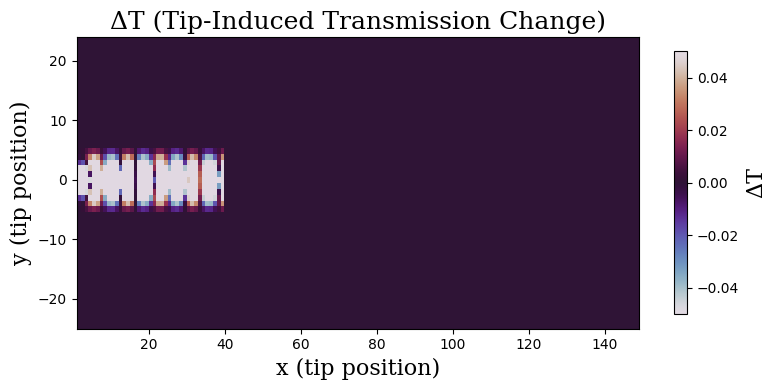

In [14]:
# Load precomputed results
T_tip = np.load('transmission_map_tip.npy')      # With tip
T_no_tip = np.load('L3.npy')                     # Without tip

# Ensure shapes match
assert T_tip.shape == T_no_tip.shape, "Mismatched shapes between tip and no-tip data."

# Compute ΔT
delta_T = T_tip - T_no_tip

# Plot
plt.figure(figsize=(8, 4))
im = plt.imshow(delta_T.T, extent=[x_vals[0], x_vals[-1], y_vals[0], y_vals[-1]],
                origin='lower', cmap="twilight", vmin=-0.05, vmax=0.05, aspect='auto')
plt.xlabel("x (tip position)", fontdict={'family': 'serif', 'size': 16})
plt.ylabel("y (tip position)", fontdict={'family': 'serif', 'size': 16})
plt.title("ΔT (Tip-Induced Transmission Change)", fontdict={'family': 'serif', 'size': 18})
cb = plt.colorbar(im, label='ΔT', shrink=0.9)
cb.ax.yaxis.label.set_font_properties({'family': 'serif', 'size': 16})
plt.tight_layout()
plt.show()


In [ ]:
import kwant
import numpy as np

def make_system(w=40):
    # Define the lattice
    lat = kwant.lattice.square()
    sys = kwant.Builder()

    # Onsite potential function (gated region)
    def pot(site, Vg):
        return Vg

    # Hopping function
    def hop(site1, site2, tc):
        return tc

    # Tip potential, localized at (x0, y0)
    def vtip(site, v, y0, x0):
        return v if site.pos == (x0, y0) else 0

    # Define scattering region
    sys[lat(0, 0)] = pot
    sys[(lat(-1, y) for y in range(-w, w + 1))] = 0
    sys[(lat(x, y) for x in range(1, 70) for y in range(-w, w + 1))] = vtip
    sys[lat.neighbors()] = -1

    # Hopping to neighbors of center site
    sys[lat(0, 0), lat(-1, 0)] = hop
    sys[lat(0, 0), lat(1, 0)] = hop

    # Define left lead
    sym = kwant.TranslationalSymmetry((-1, 0))
    lead = kwant.Builder(sym)
    lead[(lat(-2, y) for y in range(-w, w + 1))] = 0
    lead[lat.neighbors()] = -1

    # Attach leads
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed(), add_cells=0)

    return sys


# Initialize finalized system
sys = make_system()
sysf = sys.finalized()

# Collect site list (if needed later)
sites = list(sysf.sites)

# Compute transmissions for Vtip (L2)
L2 = []
for x in range(1, 70):
    row = []
    for y in range(-25, 25):
        params = {
            "Vg": -3.7634626925385075,  # Gate potential
            "tc": 0.2,                  # Hopping amplitude
            "v": 2,                     # Tip potential strength
            "x0": x, "y0": y            # Tip position
        }
        smatrix = kwant.smatrix(sysf, energy=-3.7961204013377925, params=params)
        transmission = smatrix.transmission(0, 1)
        row.append(transmission)
    L2.append(row)

# Reference transmission data (L3): constant value
L3 = [[0.9999831976949478 for y in range(-25, 25)] for x in range(1, 70)]


/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


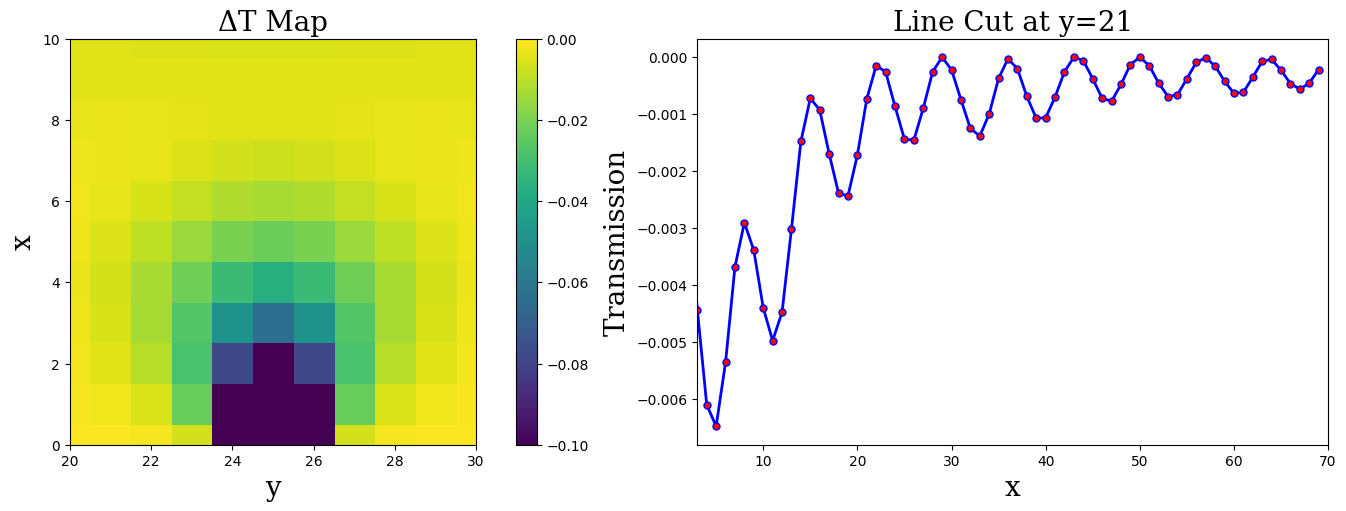

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Load data
L2 = np.load('toymodelT0=1.npy')

# Compute data difference
data2 = np.array(L2)
data3 = np.array(L3)
data4 = data2 - data3

# Font settings
font_label = {'family': 'serif', 'size': 20}
font_colorbar = matplotlib.font_manager.FontProperties(family='serif', size=20)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)

# --- Left subplot: Heatmap ---
im = ax1.imshow(data4, vmin=-0.1, vmax=0)  # Set vmax < vmin to avoid inversion
ax1.set_title("ΔT Map", fontdict=font_label)
ax1.set_xlabel("y", fontdict=font_label)
ax1.set_ylabel("x", fontdict=font_label)
ax1.set_xlim(20, 30)
ax1.set_ylim(0, 10)

# Colorbar
cb = fig.colorbar(im, ax=ax1)
cb.ax.yaxis.label.set_font_properties(font_colorbar)

# --- Right subplot: Line Plot ---
ax2.plot(range(1, 70), data4[:, 21], 'b-', linewidth=2, marker='o', ms=5, mfc='r')
ax2.set_title("Line Cut at y=21", fontdict=font_label)
ax2.set_xlabel("x", fontdict=font_label)
ax2.set_ylabel("Transmission", fontdict=font_label)
ax2.set_xlim([3, 70])

plt.show()


### ==================== In progress ==============================

### Fringe Patterns when G = 0.5:
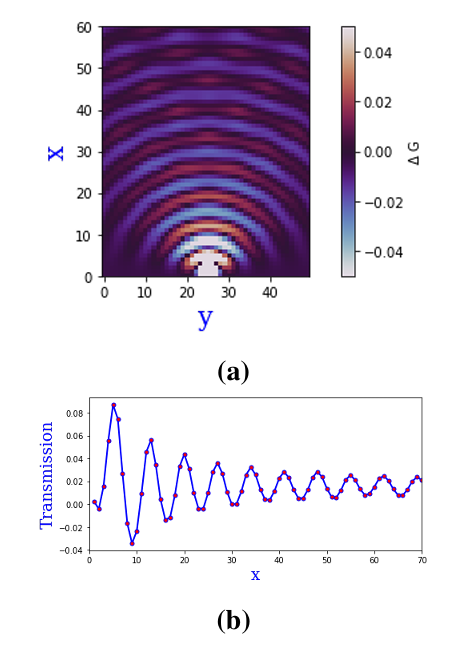


### Curve fitting for both cases G = 1 and G = 0.5:
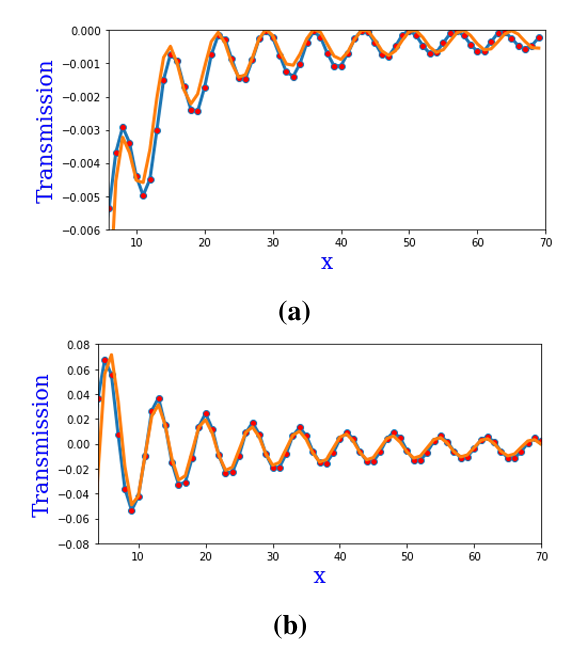

# Realistic Models

# Model Wide-Narrow-Wide (WNW)

In [49]:
import kwant
import numpy as np
import matplotlib.pyplot as plt

def make_system(w=20, w1=5, L=20):
    """Create the WNW quantum system with leads."""
    sys = kwant.Builder()
    lat = kwant.lattice.square()

    def potential(site, Vg):
        return Vg

    def tip_potential(site, v, y0, x0):
        """Radially decaying potential at the tip."""
        r_sq = (site.pos[0]-x0)**2 + (site.pos[1]-y0)**2
        if r_sq == 0: return v
        elif r_sq == 1: return v*0.5
        elif r_sq == 2: return v*0.25
        else: return 0

    # Central narrow region (W)
    sys[(lat(x,y) for x in range(-L,L+1) for y in range(-w1,w1+1))] = potential
    
    # Left wide lead region
    sys[(lat(-L-1,y) for y in range(-w,w+1))] = 0
    
    # Right wide region with tip potential (N)
    sys[(lat(x,y) for x in range(L+1,L+51) for y in range(-w,w+1))] = tip_potential
    
    # Uniform hopping
    sys[lat.neighbors()] = -1

    # Attach leads
    sym = kwant.TranslationalSymmetry((-1,0))
    lead = kwant.Builder(sym)
    lead[(lat(-2,y) for y in range(-w,w+1))] = 0
    lead[lat.neighbors()] = -1
    
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed(), add_cells=0)
    
    return sys

# Create and finalize the system
sys = make_system()
sysf = sys.finalized()

# Calculate conductance vs energy
energies = np.linspace(-4, -3, 300)  
conductances = []

for energy in energies:
    smatrix = kwant.smatrix(sysf, energy, params={'Vg': 0, 'v': 0, 'y0': 0, 'x0': 50})
    conductances.append(smatrix.transmission(1, 0))  # Transmission between leads

/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


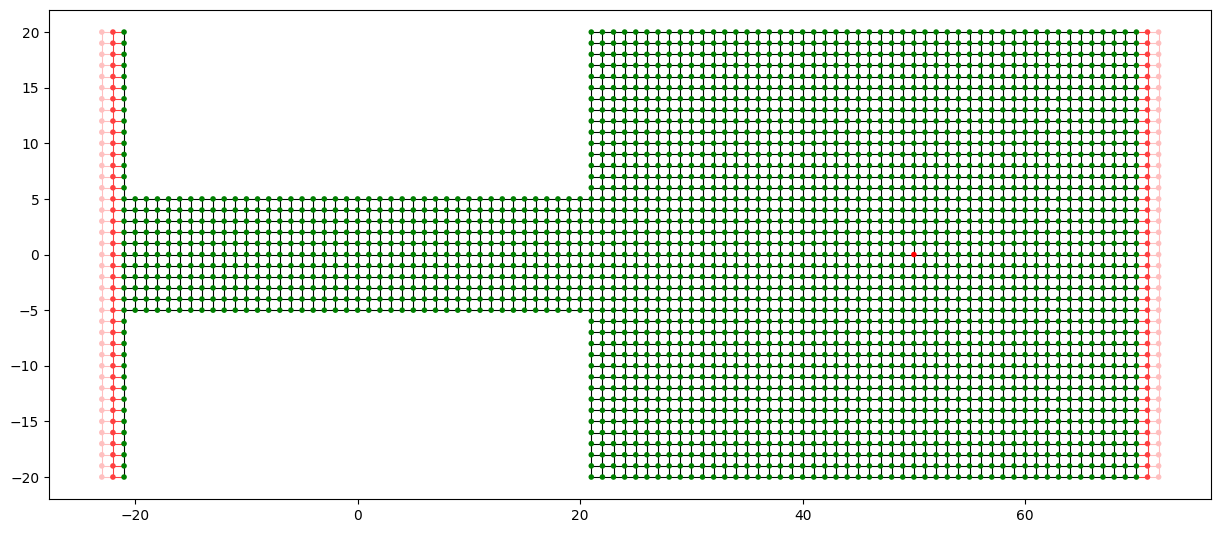

In [52]:
def Color(site,x0=50,y0=0,x1=0,x2=0): 
    if site.pos==(x0,y0): return "r"
    if site.pos==(x0-x1,0): return "k"#v-v*0.5       
    if(52-50)**2+(0)**2==(2)**(2): return "g"#v-v*0.5-v*0.25 
    else: return "b"  
kwant.plot(sys,fig_size=(15,15),site_color=Color)
plt.show()

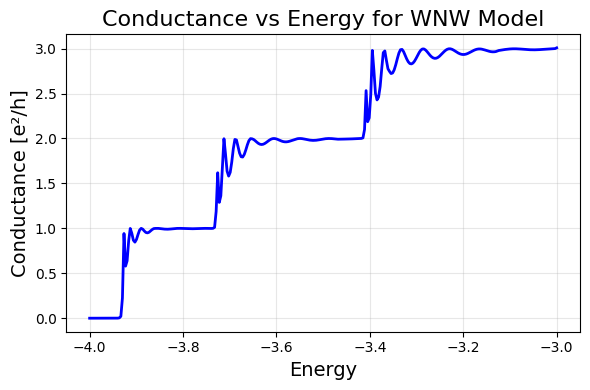

In [53]:
# Plotting
plt.figure(figsize=(6, 4))
plt.plot(energies, conductances, 'b-', linewidth=2)
plt.xlabel("Energy", fontsize=14)
plt.ylabel("Conductance [e²/h]", fontsize=14)
plt.title("Conductance vs Energy for WNW Model", fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
L2=[]
L=20
sys=make_system()
sysf=sys.finalized()

t1=time()
for x in range(L+1,L+21):
    
    
    #size=(x,0)
    L1=[]
    
    
    for y in range(-10,10):
        
        params=dict(Vg=0,tc=-1,v=2,x0=x,y0=y)

        SM= kwant.smatrix(sysf,energy=-3.8,params=params)
        T=SM.transmission(0,1)
        L1.append(T)
        
    L2.append(L1)

t2=time()
print(t2-t1)


### ==================== In progress ==============================

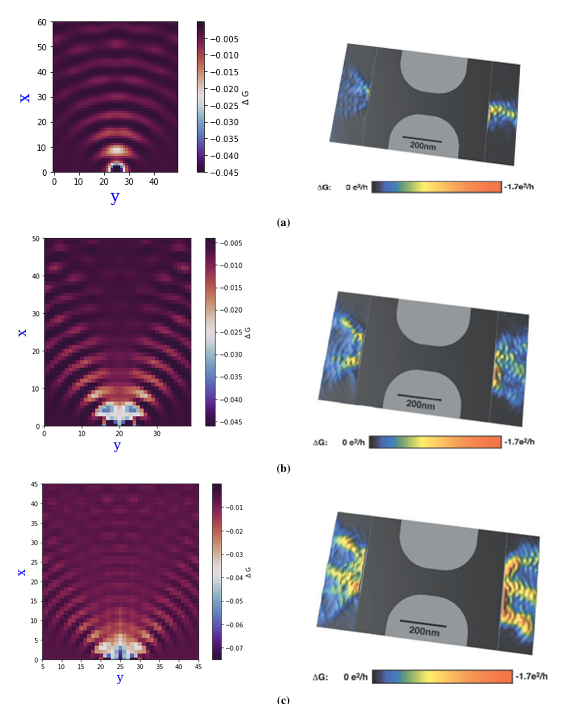

# Parabola Model 

/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


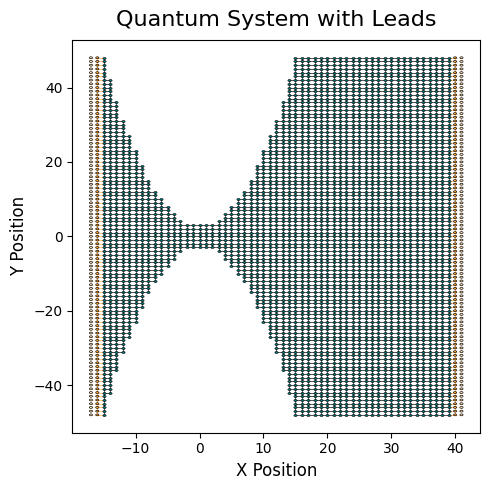

In [55]:
import kwant
import matplotlib.pyplot as plt

def confinement_shape(pos):
    """Define the confinement region for the system."""
    x, y = pos
    return (-0.2*x**2 - 3 <= y <= 3 + 0.2*x**2) and (-15 <= x <= 15)

def make_system(w=48, w1=5, L=20):
    """Create and return a Kwant system with leads."""
    lat = kwant.lattice.square()
    sys = kwant.Builder()
    
    # Define potential functions
    def potential(site, Vg):
        return Vg
    
    def hopping(site1, site2, tc):
        return tc
    
    def tip_potential(site, v, y0, x0):
        """Potential at the tip position."""
        return v if site.pos == (x0, y0) else 0
    
    # Build the scattering region #(15, 86)
    sys[lat.shape(confinement_shape, (0, 0))] = potential
    sys[(lat(x, y) for x in range(15, 40) for y in range(-w, w+1))] = tip_potential
    sys[lat.neighbors()] = -1  # Uniform hopping
    
    # Build the leads
    sym = kwant.TranslationalSymmetry((-1, 0))
    lead = kwant.Builder(sym)
    lead[(lat(-6, y) for y in range(-48, 49))] = potential
    lead[lat.neighbors()] = -1
    
    # Attach leads
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed(), add_cells=0)
    
    return sys

# Create and plot the system
system = make_system()
finalized_system = system.finalized()

# Plot with improved visualization
fig, ax = plt.subplots(figsize=(5,5))
kwant.plot(finalized_system, 
           site_color='teal', 
           site_lw=0.1, 
           lead_color='darkorange',
           ax=ax)

ax.set_title("Quantum System with Leads", fontsize=16, pad=10)
ax.set_xlabel("X Position", fontsize=12)
ax.set_ylabel("Y Position", fontsize=12)
ax.grid(False)

plt.tight_layout()
plt.show()

#### The effect of the strength of Vtip

/home/naif/ml-project-env/lib/python3.12/site-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


T = 0.7223224526874418


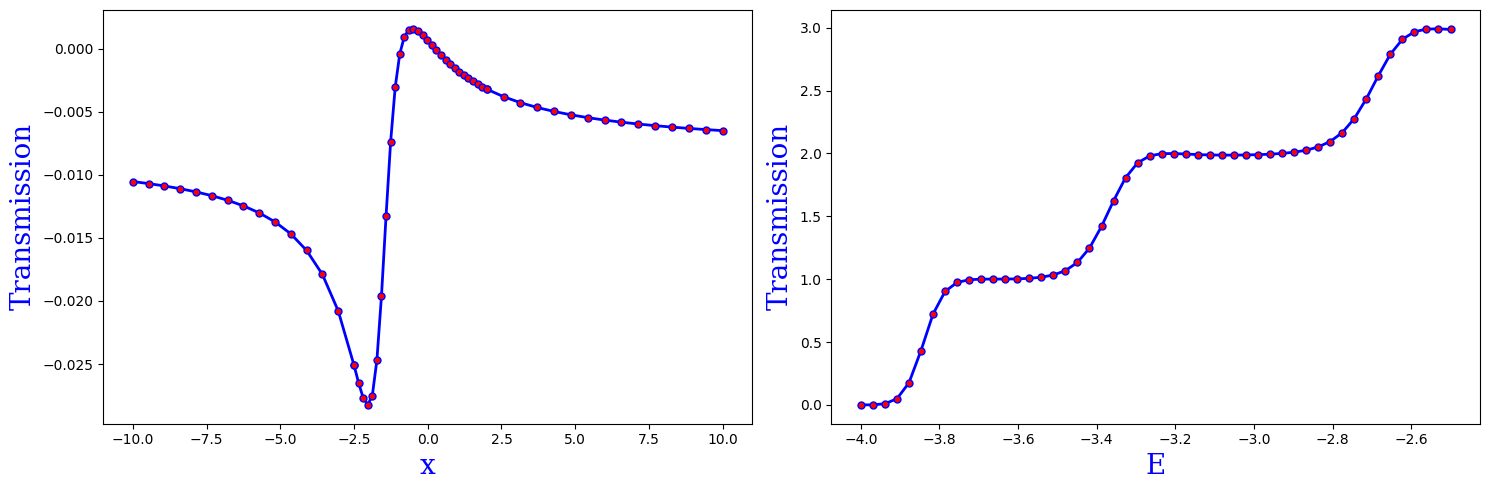

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import kwant

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
font1 = {'family': 'serif', 'color': 'blue', 'size': 20}

# --- First plot: Transmission vs x (is the potential strength on site (20, 0)) ---
L1 = []
sys = make_system()
sysf = sys.finalized()

# Define X values with different ranges
x1 = np.linspace(-10, -2.5, 15)
x2 = np.linspace(-2.5, 2, 30)
x3 = np.linspace(2, 10, 15)
X = list(x1) + list(x2) + list(x3)

# Compute transmission
for x in X:
    params = dict(Vg=0, tc=-1, v=x, x0=20, y0=0)
    SM = kwant.smatrix(sysf, energy=-3.64, params=params)
    T = SM.transmission(0, 1)
    delt_T = T - 1
    L1.append(delt_T)

# Plot first subplot
ax1.plot(X, L1, 'b-', linewidth=2, marker='o', ms=5, mfc='r')
ax1.set_xlabel("x", fontdict=font1)
ax1.set_ylabel("Transmission", fontdict=font1)

# --- Second plot: Transmission vs energy ---
T1 = []
sysf = sys.finalized()
Tmax = 2
X = np.linspace(-4, -2.5)

# Compute transmission for energy values
for x in X:
    params = dict(Vg=0, tc=-1, v=0, x0=1, y0=1)
    smatrix = kwant.smatrix(sysf, energy=x, params=params)
    T = smatrix.transmission(1, 0)
    T1.append(T)
    if T == 0.6122751849533864:
        print('at T=0.6122751849533864, energy =', x)

# Find and print closest value to given transmission
given_value = 0.6
closest_value = min(T1, key=lambda val: abs(val - given_value))
print('T =', closest_value)

# Plot second subplot
ax2.plot(X, T1, 'b-', linewidth=2, marker='o', ms=5, mfc='r')
ax2.set_xlabel("E", fontdict=font1)
ax2.set_ylabel("Transmission", fontdict=font1)

plt.tight_layout()
plt.show()
